In [1]:
import pandas as pd
import numpy as np
import math 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.core.window.rolling import Rolling
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

warnings.filterwarnings("ignore")

import datetime

df = pd.read_csv('Coca-Cola_stock_history.csv', index_col=['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15311 entries, 1962-01-02 to 2022-10-26 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          15311 non-null  float64
 1   High          15311 non-null  float64
 2   Low           15311 non-null  float64
 3   Close         15311 non-null  float64
 4   Volume        15311 non-null  int64  
 5   Dividends     15311 non-null  float64
 6   Stock Splits  15311 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 956.9+ KB


In [2]:
df.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [3]:
df.index = pd.to_datetime(df.index,utc=True)
#df.index = df.index.replace(tzinfo=None)
#df = df.drop(['Volume', 'Dividends','Stock Splits'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15311 entries, 1962-01-02 00:00:00+00:00 to 2022-10-26 04:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          15311 non-null  float64
 1   High          15311 non-null  float64
 2   Low           15311 non-null  float64
 3   Close         15311 non-null  float64
 4   Volume        15311 non-null  int64  
 5   Dividends     15311 non-null  float64
 6   Stock Splits  15311 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 956.9 KB


In [4]:
df.nunique()

Open            14855
High            14547
Low             14580
Close           11105
Volume          10396
Dividends          64
Stock Splits        3
dtype: int64

In [5]:
df[df['Close'].duplicated() == True]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1962-01-11 00:00:00+00:00,0.048778,0.049273,0.048530,0.049273,614400,0.0,0
1962-01-12 00:00:00+00:00,0.049273,0.049273,0.048406,0.048902,883200,0.0,0
1962-01-29 00:00:00+00:00,0.044569,0.044692,0.044445,0.044569,307200,0.0,0
1962-02-01 00:00:00+00:00,0.046549,0.047292,0.046549,0.046549,1420800,0.0,0
1962-02-05 00:00:00+00:00,0.047045,0.047045,0.046673,0.047045,384000,0.0,0
...,...,...,...,...,...,...,...
2022-07-07 04:00:00+00:00,62.802120,63.119807,62.246176,62.454655,14828400,0.0,0
2022-08-29 04:00:00+00:00,62.236248,62.573787,61.958275,62.275959,9115900,0.0,0
2022-09-02 04:00:00+00:00,61.938420,62.315671,60.459207,60.707397,11808900,0.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15311 entries, 1962-01-02 00:00:00+00:00 to 2022-10-26 04:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          15311 non-null  float64
 1   High          15311 non-null  float64
 2   Low           15311 non-null  float64
 3   Close         15311 non-null  float64
 4   Volume        15311 non-null  int64  
 5   Dividends     15311 non-null  float64
 6   Stock Splits  15311 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 956.9 KB


In [7]:
x = df.index
y = df['Close']
y

Date
1962-01-02 00:00:00+00:00     0.050016
1962-01-03 00:00:00+00:00     0.048902
1962-01-04 00:00:00+00:00     0.049273
1962-01-05 00:00:00+00:00     0.048159
1962-01-08 00:00:00+00:00     0.047664
                               ...    
2022-10-20 04:00:00+00:00    55.080002
2022-10-21 04:00:00+00:00    55.959999
2022-10-24 04:00:00+00:00    57.570000
2022-10-25 04:00:00+00:00    58.950001
2022-10-26 04:00:00+00:00    59.389999
Name: Close, Length: 15311, dtype: float64

In [8]:
x_1 = df.index
y_1 = df['High']
y_1

Date
1962-01-02 00:00:00+00:00     0.051378
1962-01-03 00:00:00+00:00     0.049273
1962-01-04 00:00:00+00:00     0.049645
1962-01-05 00:00:00+00:00     0.049892
1962-01-08 00:00:00+00:00     0.047787
                               ...    
2022-10-20 04:00:00+00:00    55.919998
2022-10-21 04:00:00+00:00    56.110001
2022-10-24 04:00:00+00:00    57.730000
2022-10-25 04:00:00+00:00    59.110001
2022-10-26 04:00:00+00:00    59.779999
Name: High, Length: 15311, dtype: float64

In [9]:
x_2 = df.index
y_2 = df['Open']


In [10]:
x_3 = df.index
y_3 = df['Low']


In [11]:


def df_plot(data, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x_1, y_1, color='tab:blue')
    plt.plot(x_2, y_2, color='tab:green')
    plt.plot(x_3, y_3, color='tab:pink')
    plt.plot(x, y, color='tab:red')

    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
df.reset_index(inplace=True) # to reset index and convert it to column

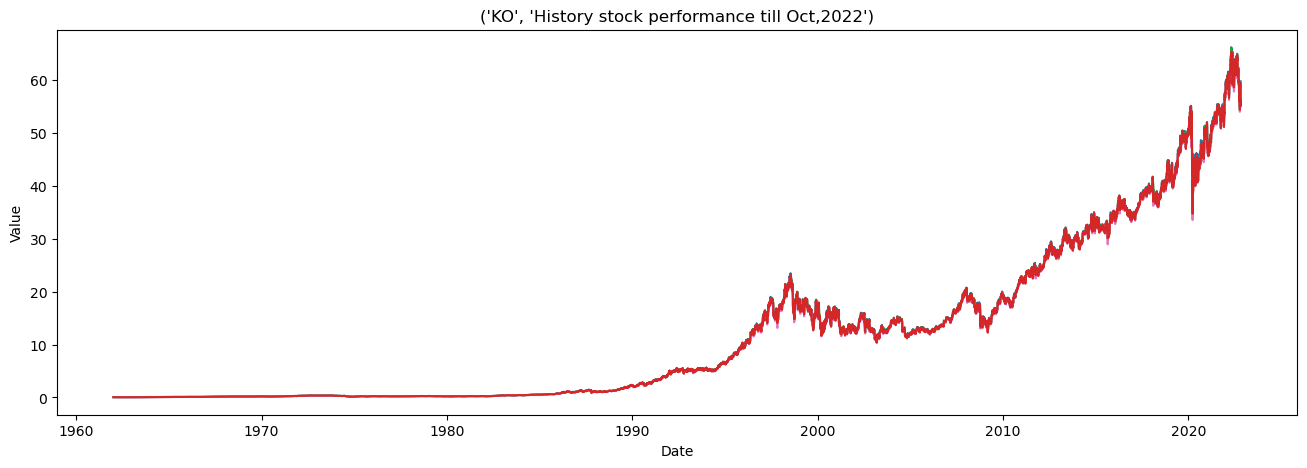

In [12]:

title = ("KO","History stock performance till Oct,2022")
df_plot(df , x , y , title=title,xlabel='Date', ylabel='Value',dpi=100)

<Figure size 1600x800 with 0 Axes>

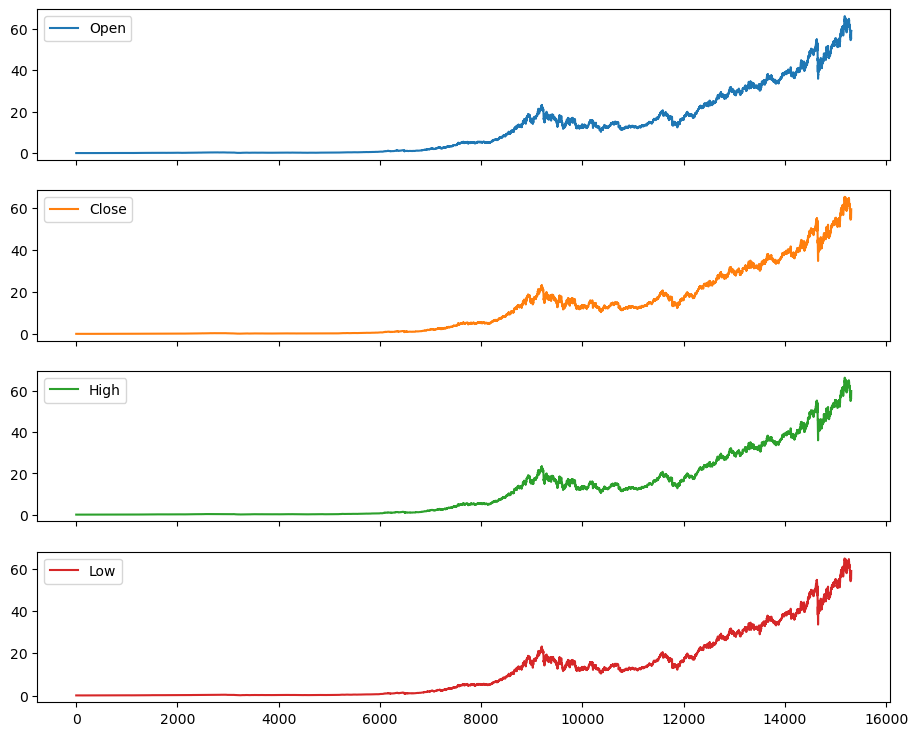

In [13]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'High', 'Low']
axes = df[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          15311 non-null  datetime64[ns, UTC]
 1   Open          15311 non-null  float64            
 2   High          15311 non-null  float64            
 3   Low           15311 non-null  float64            
 4   Close         15311 non-null  float64            
 5   Volume        15311 non-null  int64              
 6   Dividends     15311 non-null  float64            
 7   Stock Splits  15311 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2)
memory usage: 957.1 KB


In [15]:
df['date_delta'] = (df['Date'] - df['Date'].min())  / np.timedelta64(1,'D')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          15311 non-null  datetime64[ns, UTC]
 1   Open          15311 non-null  float64            
 2   High          15311 non-null  float64            
 3   Low           15311 non-null  float64            
 4   Close         15311 non-null  float64            
 5   Volume        15311 non-null  int64              
 6   Dividends     15311 non-null  float64            
 7   Stock Splits  15311 non-null  int64              
 8   date_delta    15311 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 1.1 MB


In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[['Close','Open','High','Low','Volume', 'Dividends','Stock Splits','date_delta']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

        feature           VIF
0         Close  44326.043243
1          Open  38947.564611
2          High  48447.965527
3           Low  41399.624343
4        Volume      4.382166
5     Dividends      1.018906
6  Stock Splits      1.000640
7    date_delta      8.926260


In [17]:
x = df[['Volume','date_delta']]
y = df['Close']

In [18]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20 , shuffle=False,random_state = 0)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regression = LinearRegression()
regression.fit(train_x, train_y)
print("regression coefficient",regression.coef_)
print("regression intercept",regression.intercept_)

regression coefficient [-1.12313269e-07  1.22789933e-03]
regression intercept -4.699962581328602


In [20]:
# the coefficient of determination R² 
regression_confidence = regression.score(test_x, test_y)
print("linear regression confidence: ", regression_confidence)

linear regression confidence:  -3.017689062162349


In [21]:
predicted=regression.predict(test_x)
#print(test_x.head())

In [22]:
dfr=pd.DataFrame({'Actual_Price':test_y, 'Predicted_Price':predicted})
dfr.head()

,Actual_Price,Predicted_Price
12248,19.236696,14.910077
12249,19.027758,15.974627
12250,19.140793,15.038287
12251,19.630617,14.410762
12252,19.654594,15.475013


In [23]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y, predicted))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(test_y, predicted))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(test_y, predicted)))

Mean Absolute Error (MAE): 19.46095411599748
Mean Squared Error (MSE) : 463.9558348904942
Root Mean Squared Error (RMSE): 21.539634047274205


In [24]:
x2 = dfr.Actual_Price.mean()
y2 = dfr.Predicted_Price.mean()
Accuracy1 = (y2)/x2 *100
print("The accuracy of the model is " , Accuracy1)

The accuracy of the model is  48.29835193205081


Text(0.5, 1.0, 'Coca-Cola prediction chart')

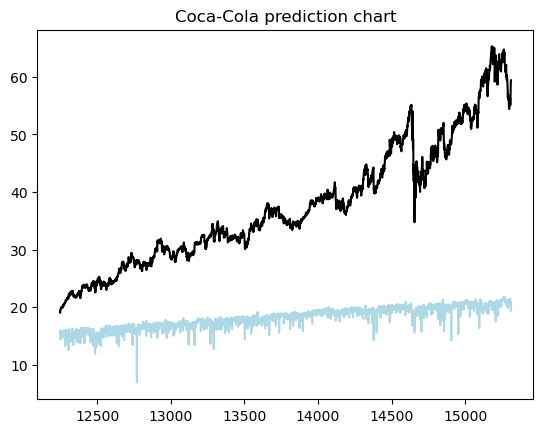

In [25]:
plt.plot(dfr.Actual_Price, color='black')
plt.plot(dfr.Predicted_Price, color='lightblue')
plt.title("Coca-Cola prediction chart")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          15311 non-null  datetime64[ns, UTC]
 1   Open          15311 non-null  float64            
 2   High          15311 non-null  float64            
 3   Low           15311 non-null  float64            
 4   Close         15311 non-null  float64            
 5   Volume        15311 non-null  int64              
 6   Dividends     15311 non-null  float64            
 7   Stock Splits  15311 non-null  int64              
 8   date_delta    15311 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 1.1 MB


In [27]:
df.set_index('Date',inplace=True)


In [28]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date_delta
Date,,,,,,,,
1962-01-02 00:00:00+00:00,0.050016,0.051378,0.050016,0.050016,806400,0.0,0,0.0
1962-01-03 00:00:00+00:00,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0,1.0
1962-01-04 00:00:00+00:00,0.049026,0.049645,0.049026,0.049273,844800,0.0,0,2.0
1962-01-05 00:00:00+00:00,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0,3.0
1962-01-08 00:00:00+00:00,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0,6.0


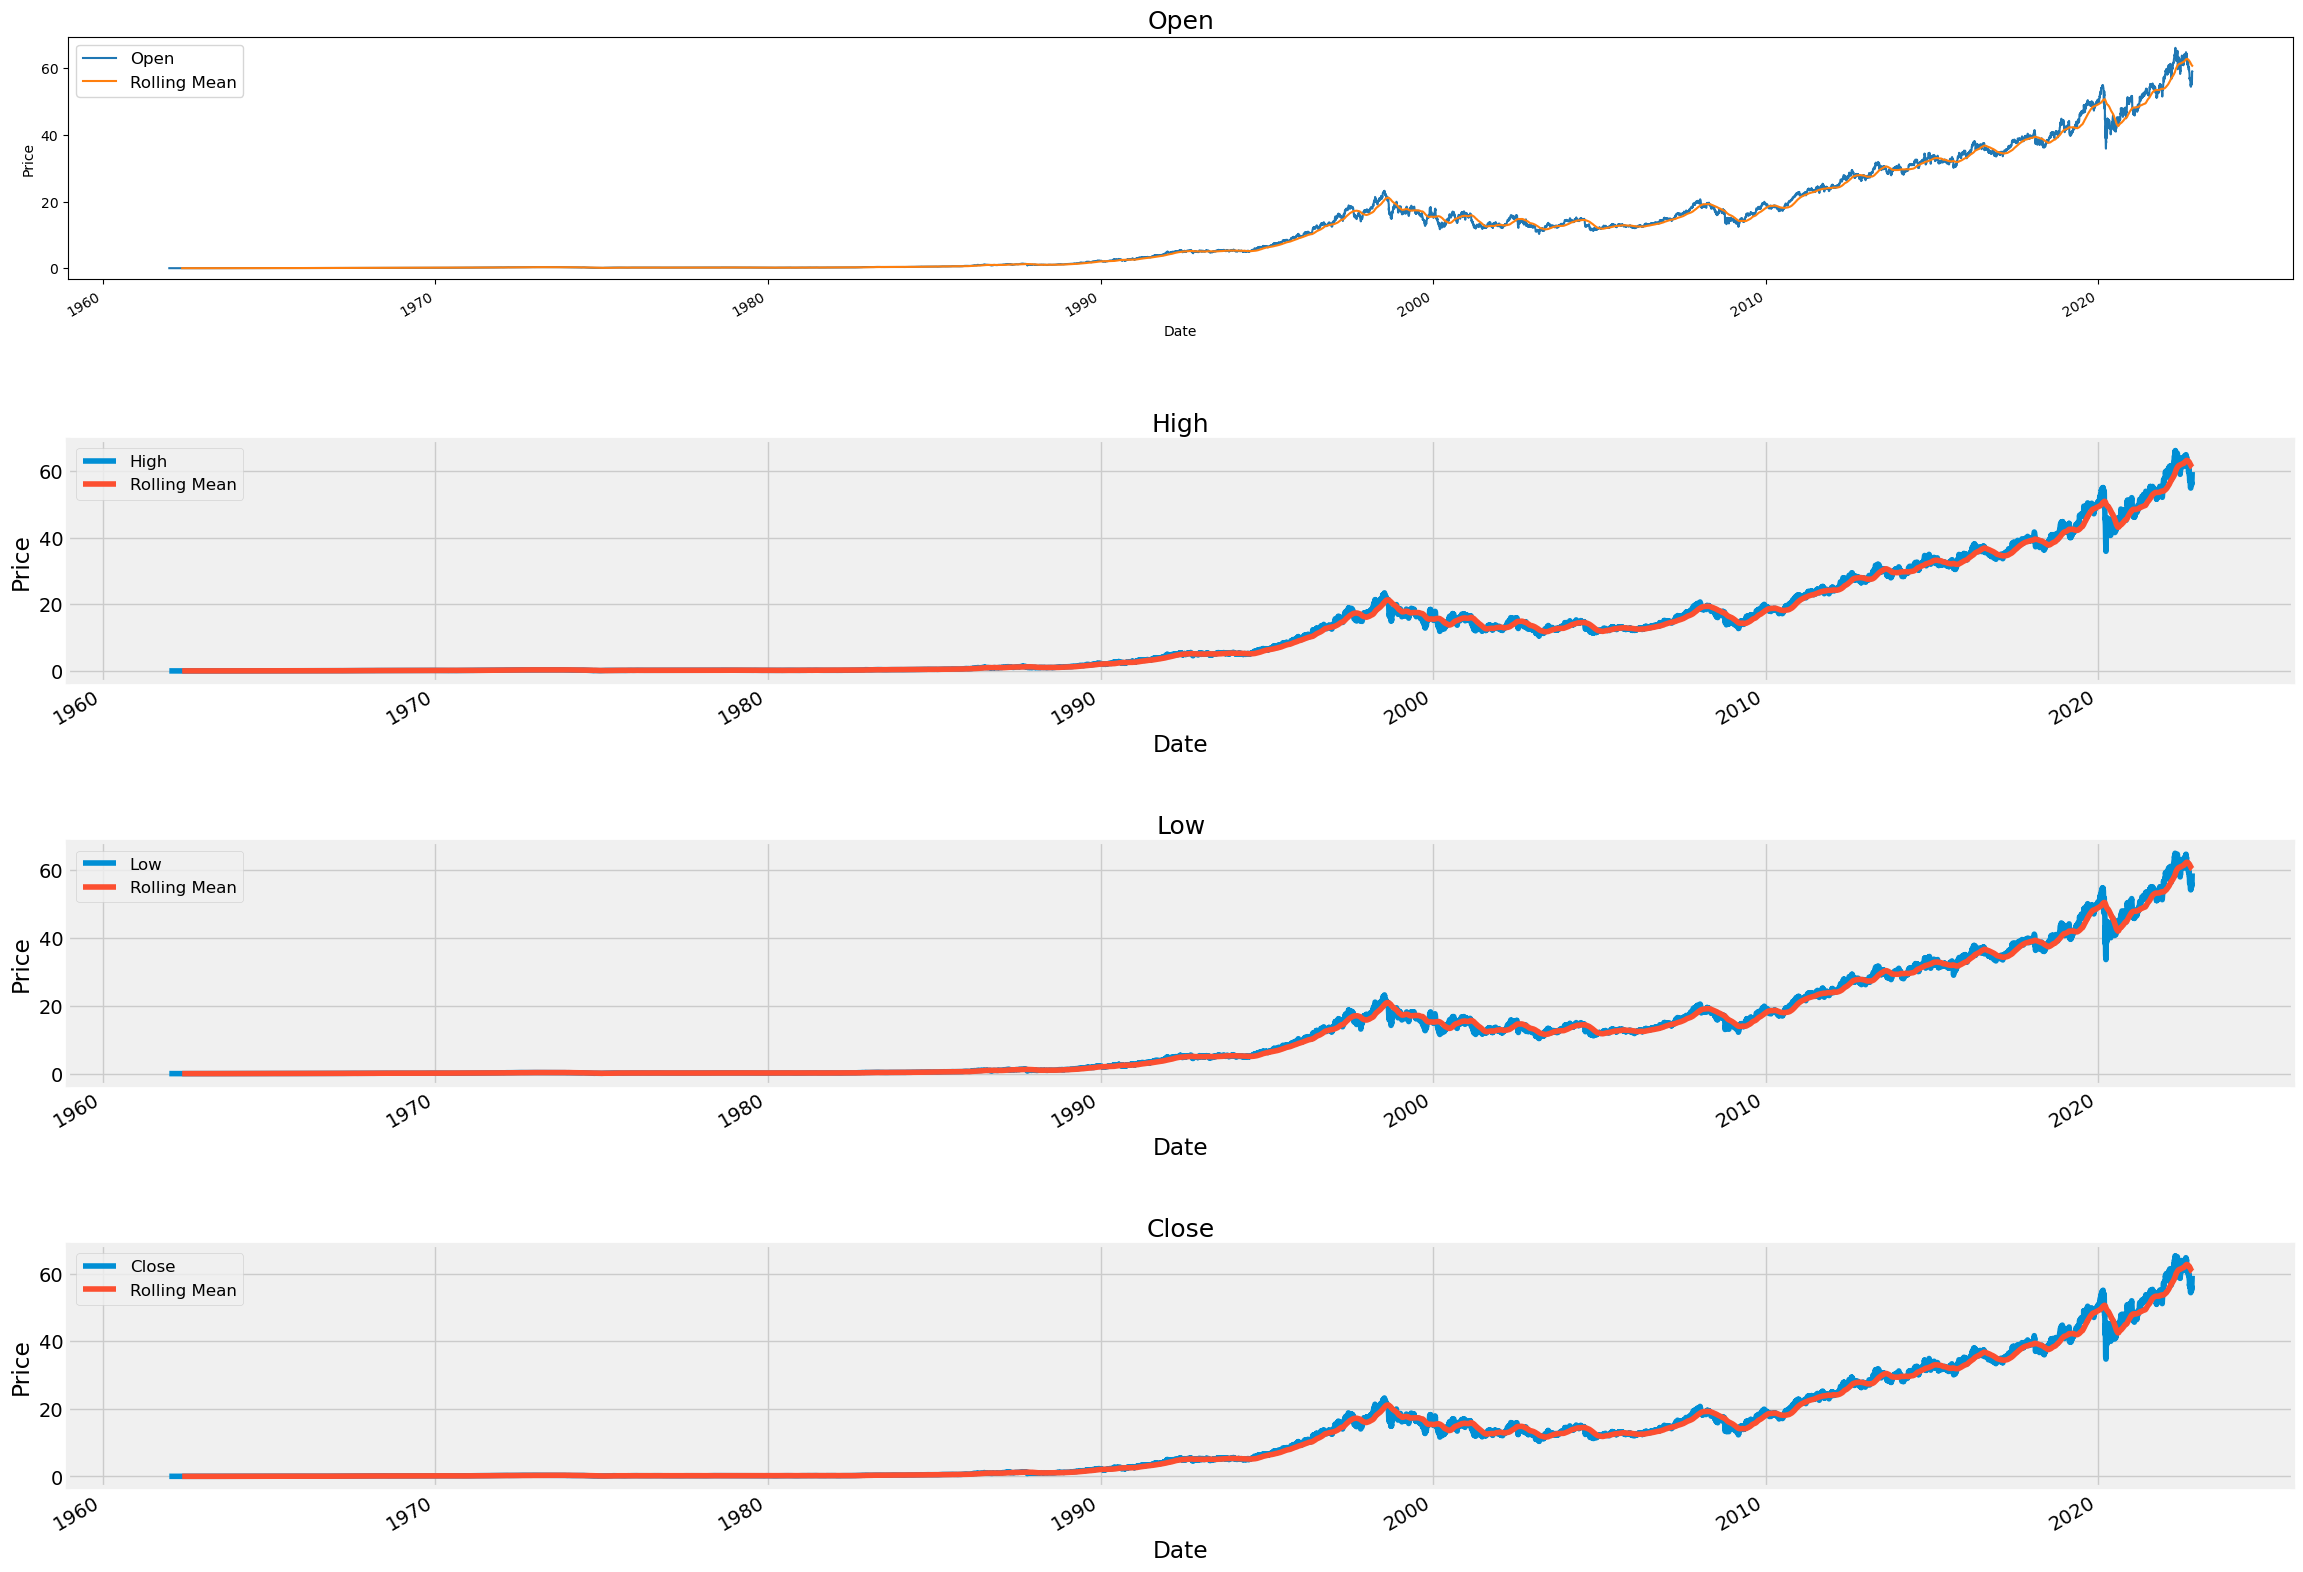

In [29]:
col_names = df.columns

fig = plt.figure(figsize=(24, 24))
for i in range(4):
  ax = fig.add_subplot(6,1,i+1)
  ax.plot(df.iloc[:,i],label=col_names[i])
  df.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean')
  ax.set_title(col_names[i],fontsize=18)
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  ax.patch.set_edgecolor('black')  
  plt.style.context('fivethirtyeight')
  plt.legend(prop={'size': 12})
  plt.style.use('fivethirtyeight')

fig.tight_layout(pad=3.0)

plt.show()

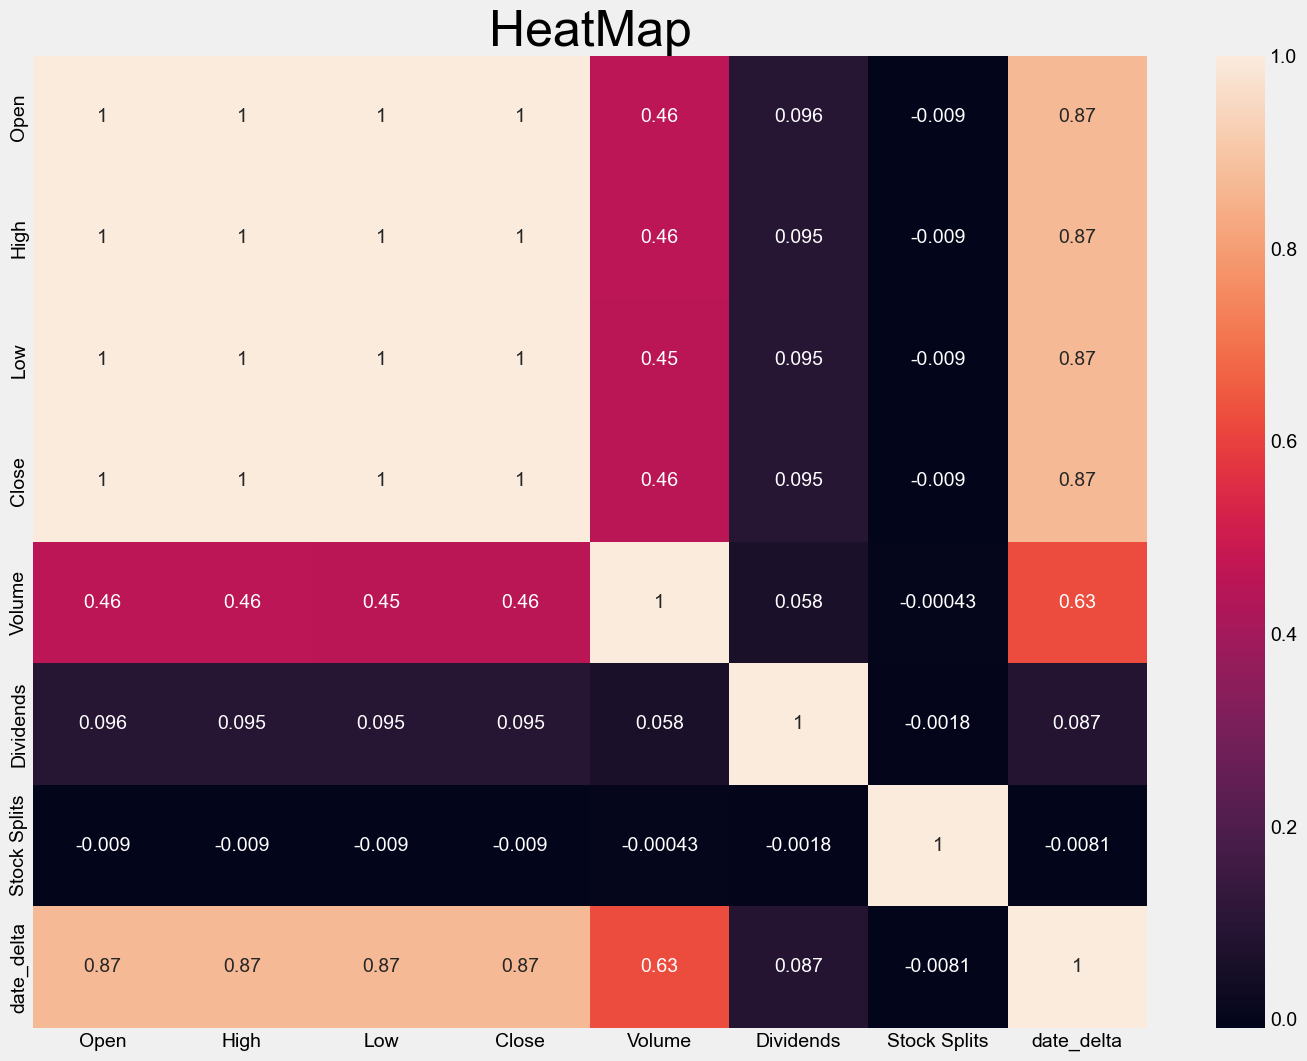

In [30]:
fig = plt.figure(figsize=(16,12))
matrix = np.triu(df.corr())
ax = sns.heatmap(df.corr(),annot=True)
sns.set(font_scale=3)
ax.set_title('HeatMap')
plt.show()

In [31]:
#df = df.drop(['Volume', 'Dividends','Stock Splits'], axis=1)

##Data after feature selection
df1 = df.drop(['Open','High','Low','Dividends','Stock Splits','date_delta'], axis=1)

     
print(df1.head())
df1.tail()

                              Close   Volume
Date                                        
1962-01-02 00:00:00+00:00  0.050016   806400
1962-01-03 00:00:00+00:00  0.048902  1574400
1962-01-04 00:00:00+00:00  0.049273   844800
1962-01-05 00:00:00+00:00  0.048159  1420800
1962-01-08 00:00:00+00:00  0.047664  2035200


,Close,Volume
Date,,
2022-10-20 04:00:00+00:00,55.080002,16905100
2022-10-21 04:00:00+00:00,55.959999,15028000
2022-10-24 04:00:00+00:00,57.570000,17416700
2022-10-25 04:00:00+00:00,58.950001,28829900
2022-10-26 04:00:00+00:00,59.389999,15831400


In [32]:


##Resample Data to Monthly instead of Daily by Aggregating Using Mean
monthly_mean = df1['Close'].resample('M').mean()
     


In [33]:


monthly_data = monthly_mean.to_frame()
monthly_data
     


,Close
Date,
1962-01-31 00:00:00+00:00,0.047101
1962-02-28 00:00:00+00:00,0.046269
1962-03-31 00:00:00+00:00,0.046883
1962-04-30 00:00:00+00:00,0.047475
1962-05-31 00:00:00+00:00,0.044320
...,...
2022-06-30 00:00:00+00:00,61.186717
2022-07-31 00:00:00+00:00,62.298791
2022-08-31 00:00:00+00:00,63.352026


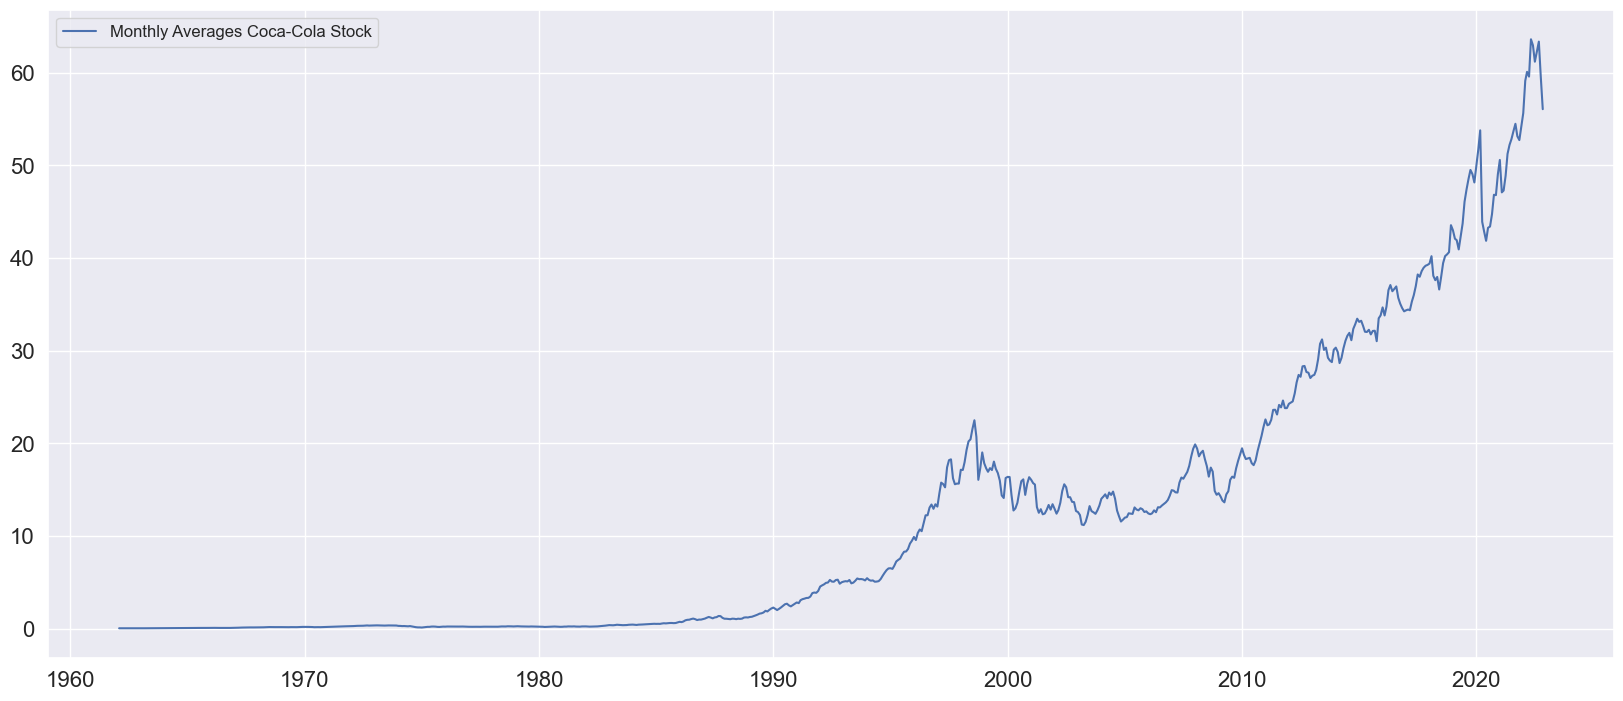

In [34]:
##Monthly Stock Price 
fig = plt.figure(figsize=(18,8))
plt.plot(monthly_data['Close'],label='Monthly Averages Coca-Cola Stock')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Monthly Resampled Data')
plt.legend(prop={'size': 12})
plt.show()

In [35]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter
monthly_data

,Close,Year,Month,dayofweek,quarter
Date,,,,,
1962-01-31 00:00:00+00:00,0.047101,1962,January,Wednesday,1
1962-02-28 00:00:00+00:00,0.046269,1962,February,Wednesday,1
1962-03-31 00:00:00+00:00,0.046883,1962,March,Saturday,1
1962-04-30 00:00:00+00:00,0.047475,1962,April,Monday,2
1962-05-31 00:00:00+00:00,0.044320,1962,May,Thursday,2
...,...,...,...,...,...
2022-06-30 00:00:00+00:00,61.186717,2022,June,Thursday,2
2022-07-31 00:00:00+00:00,62.298791,2022,July,Sunday,3
2022-08-31 00:00:00+00:00,63.352026,2022,August,Wednesday,3


<Figure size 2000x1600 with 0 Axes>

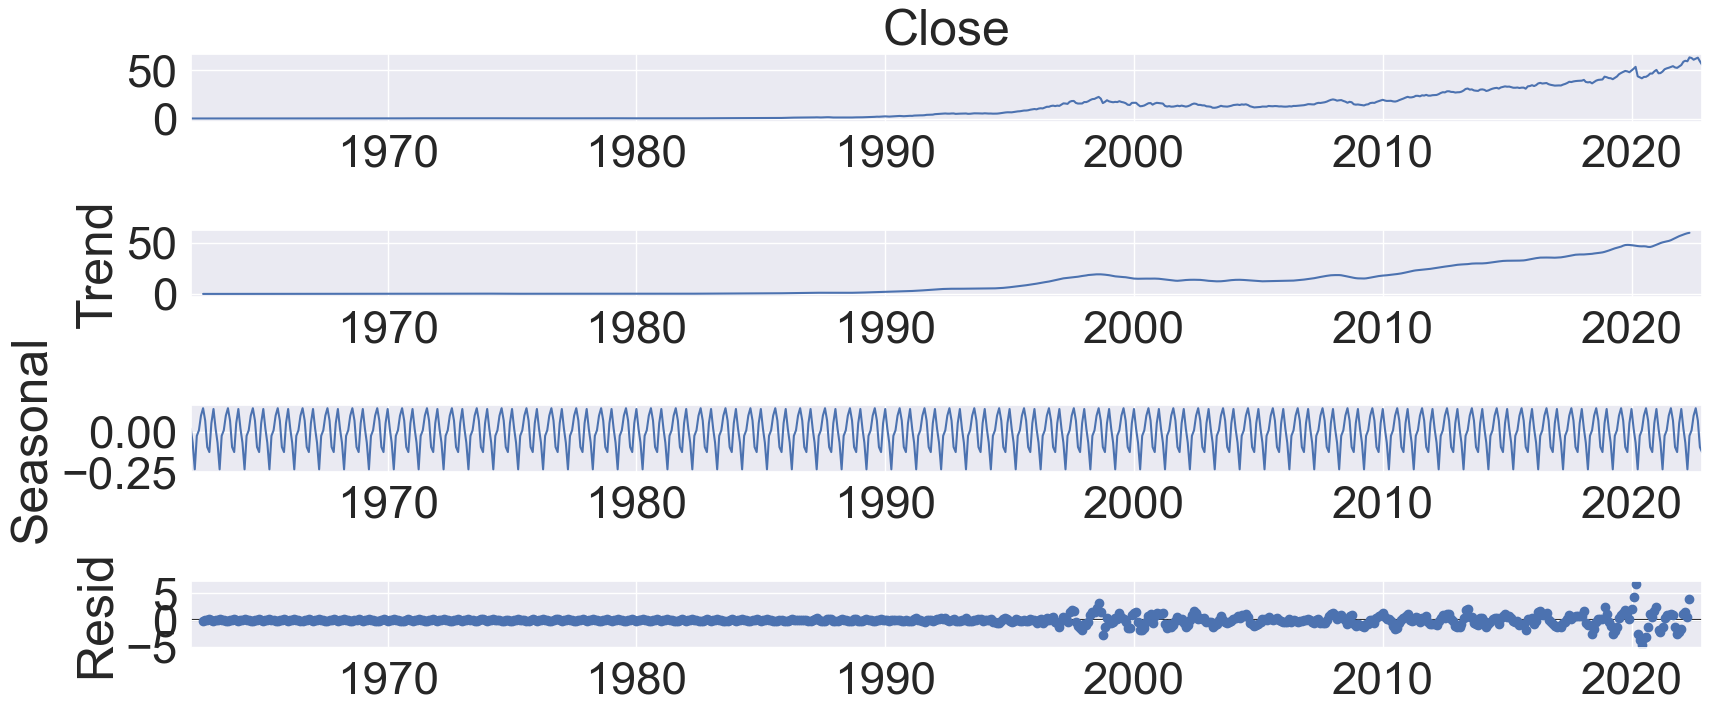

In [36]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose as sd
rcParams['figure.figsize'] = 18, 8
plt.figure(figsize=(20,16))
decomposed_series = sd(monthly_data['Close'],model='additive',period=12)
decomposed_series.plot()
plt.show()

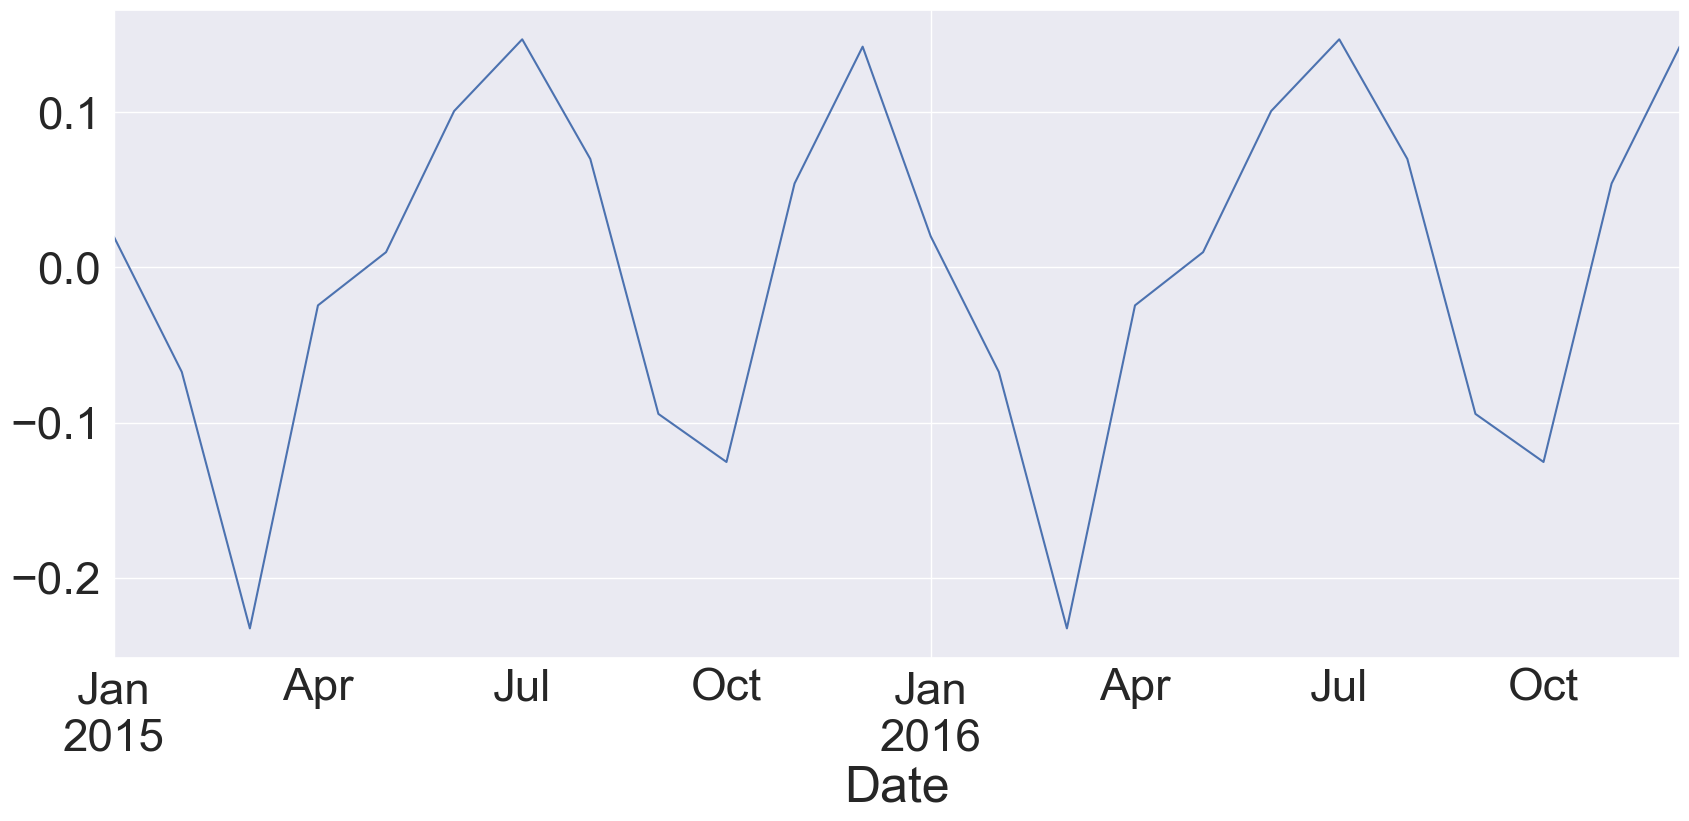

<Figure size 1200x1200 with 0 Axes>

In [37]:
##Drilling Down and Observing Seasonality
decomposed_series.seasonal['2015':'2016'].plot()
fig = plt.figure(figsize=(12,12))

In [38]:
def ad_fuller_func(X):
  result_ad_fuller = adfuller(X)
  print('ADF Statistic: %f' % result_ad_fuller[0])
  print('p-value: %f' %result_ad_fuller[1])
  print('Critical Values:')
  for key, value in result_ad_fuller[4].items():
	  print('\t%s: %.3f' % (key, value))
        


ad_fuller_func(monthly_data['Close'])
     


ADF Statistic: 3.763180
p-value: 1.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [39]:
modelling_series = monthly_data['Close']
#modelling_series

In [40]:
from sklearn.model_selection import train_test_split as split

train,test = split(modelling_series,train_size=0.8,shuffle=False)

In [41]:
print('Train',len(train))
print('Test',len(test))
train

Train 584
Test 146


Date
1962-01-31 00:00:00+00:00     0.047101
1962-02-28 00:00:00+00:00     0.046269
1962-03-31 00:00:00+00:00     0.046883
1962-04-30 00:00:00+00:00     0.047475
1962-05-31 00:00:00+00:00     0.044320
                               ...    
2010-04-30 00:00:00+00:00    18.437089
2010-05-31 00:00:00+00:00    17.859683
2010-06-30 00:00:00+00:00    17.649650
2010-07-31 00:00:00+00:00    18.163757
2010-08-31 00:00:00+00:00    19.179250
Freq: M, Name: Close, Length: 584, dtype: float64

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=763.810, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=776.492, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=743.323, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=731.957, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=777.336, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=732.935, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=728.057, Time=0.41 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=731.144, Time=0.20 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=726.330, Time=1.01 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=724.669, Time=0.39 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=762.532, Time=0.34 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=721.652, Time=0.64 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=727.900, Time=0.27 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=723.322, Time=1.10 sec
 ARIMA(1,1,1)(1,0,1)[12] intercep

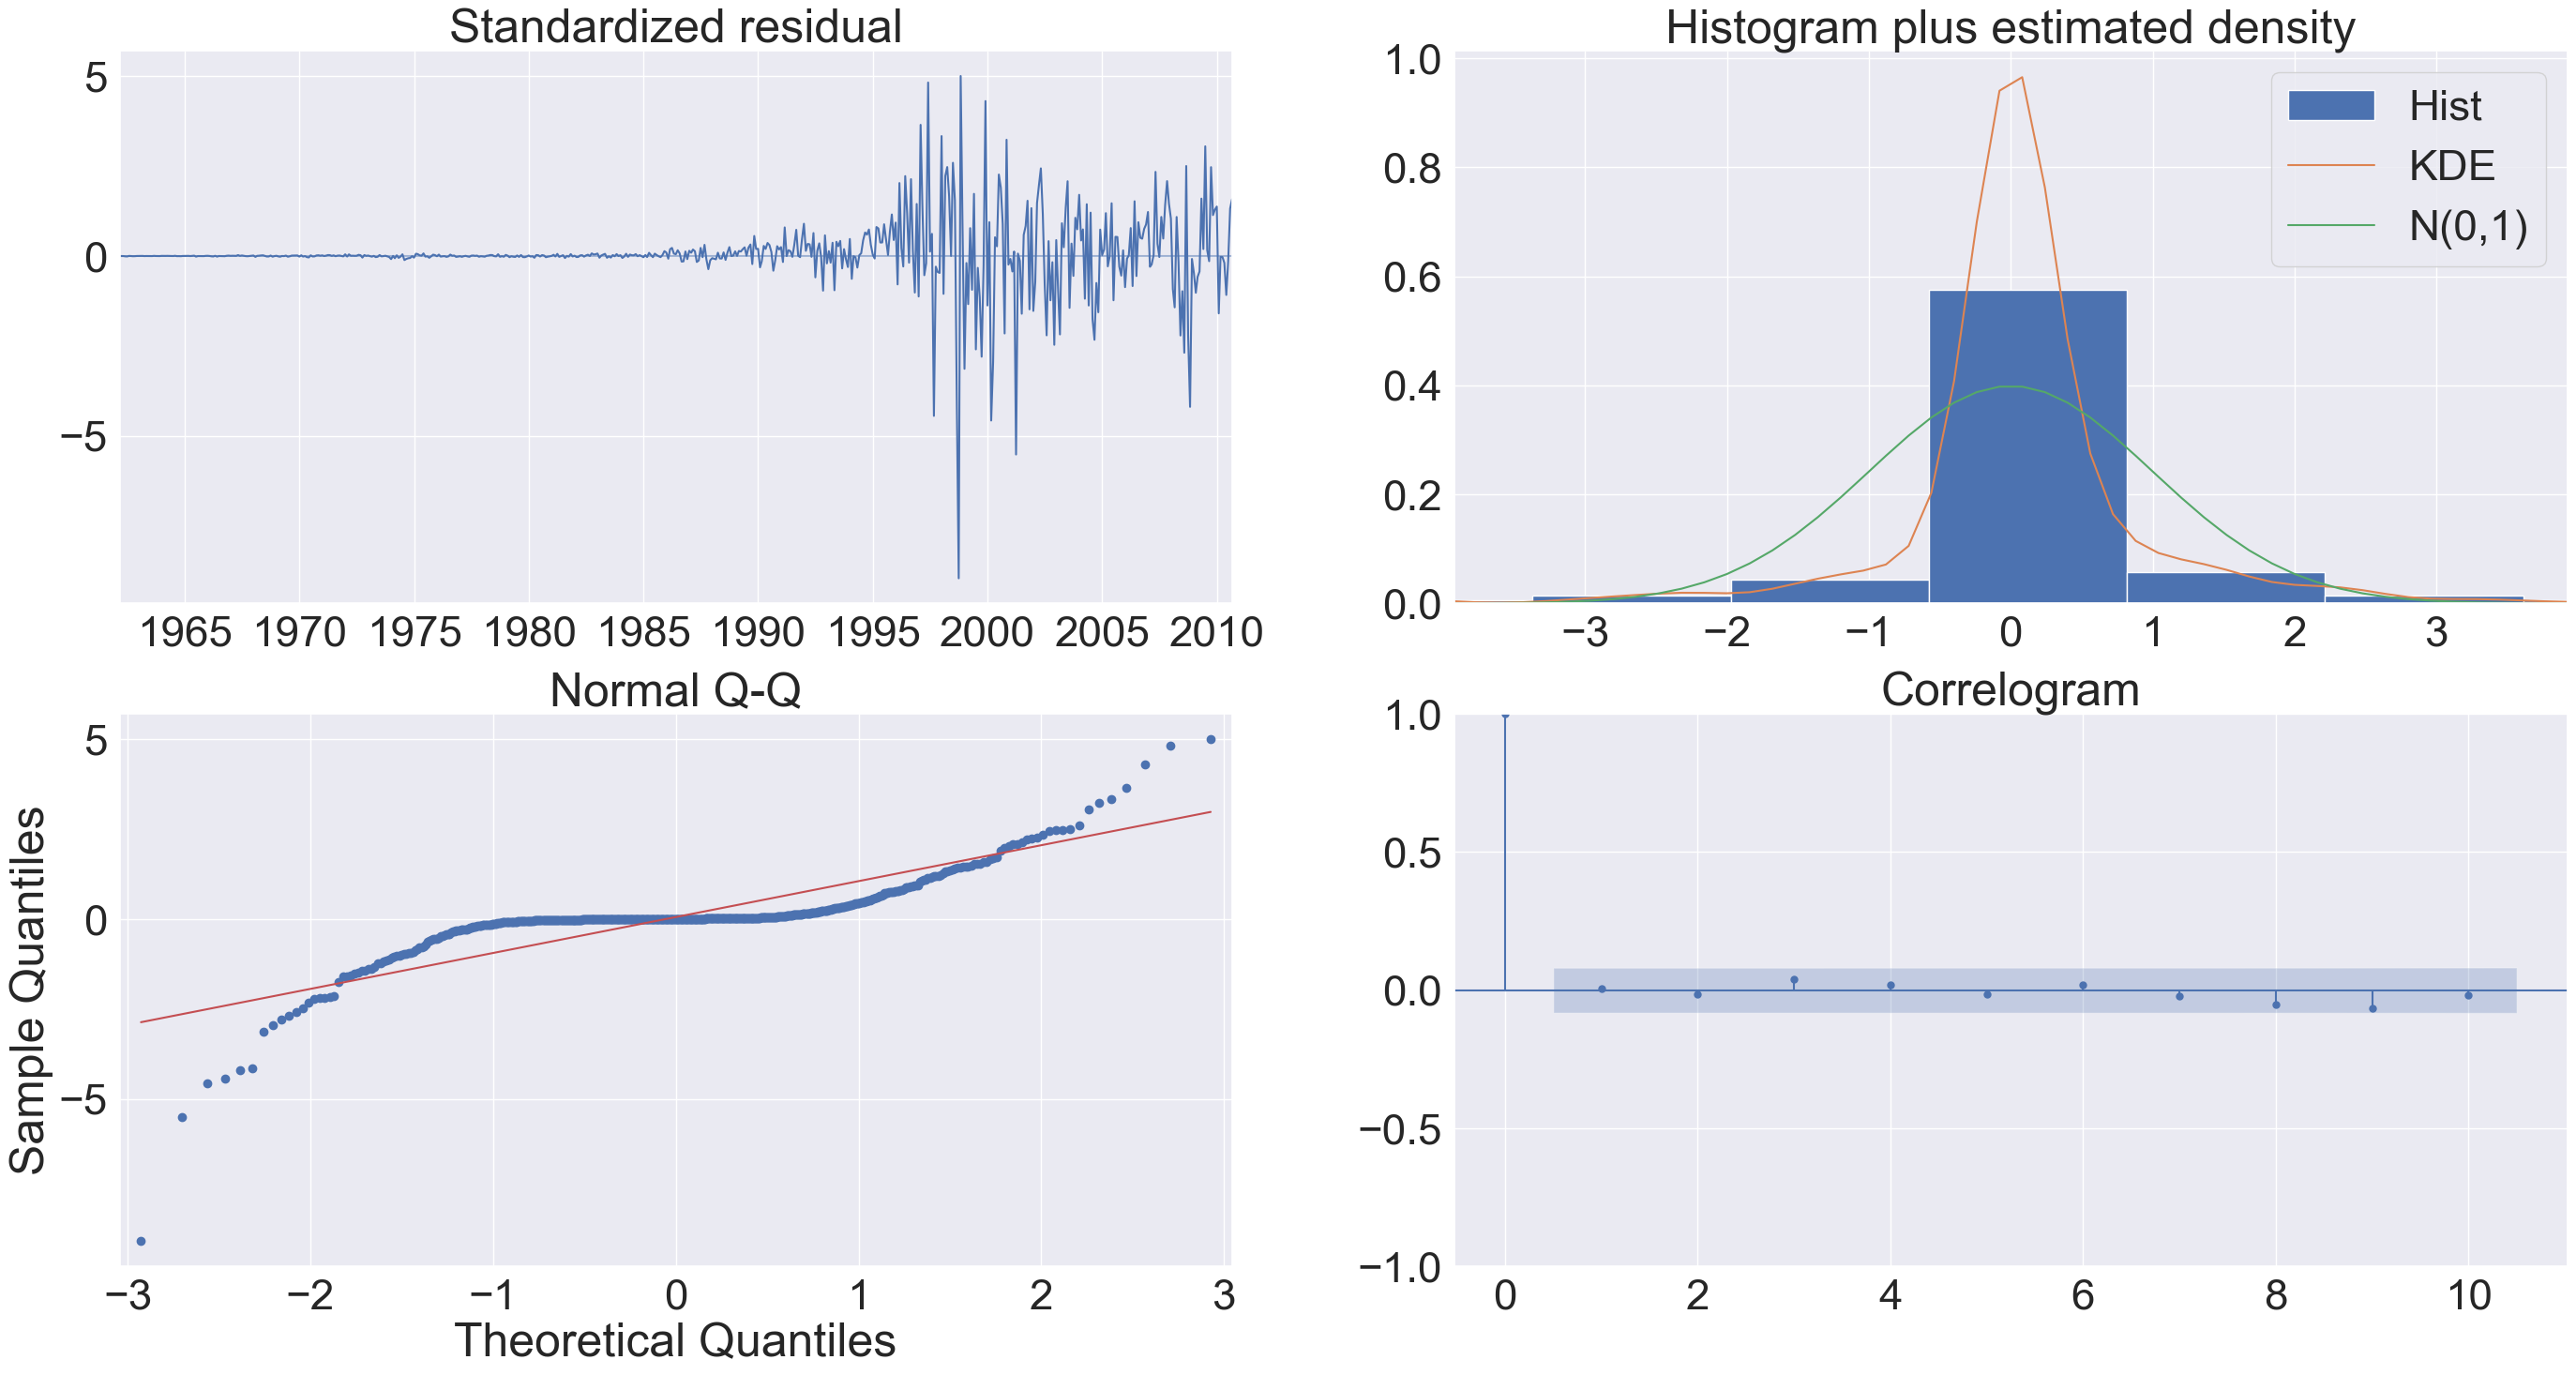

In [42]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_autoARIMA = auto_arima(train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=12,              # frequency of series
                      seasonal=True,   
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(30,16))
plt.show()

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model2=SARIMAX(modelling_series,order = (2,1,0),seasonal_order = (2,0,0,12),error_action="ignore",
               supress_warnings = 'true')
model2=model2.fit()
print(model2.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13164D+00    |proj g|=  2.67509D-02

At iterate    5    f=  1.13152D+00    |proj g|=  4.33240D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      5      8      1     0     0   4.332D-06   1.132D+00
  F =   1.1315152247882017     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                     SARIMAX Results                                      
Dep. Variable:                           

 This problem is unconstrained.


2022-10-27 04:00:00+00:00              56.272037
2022-11-29 08:21:49.090909091+00:00    56.923679
2023-01-01 12:43:38.181818182+00:00    56.849906
2023-02-03 17:05:27.272727273+00:00    56.918868
2023-03-08 21:27:16.363636364+00:00    57.054932
2023-04-11 01:49:05.454545456+00:00    57.633448
2023-05-14 06:10:54.545454546+00:00    57.700375
2023-06-16 10:32:43.636363636+00:00    57.643578
2023-07-19 14:54:32.727272728+00:00    57.826723
2023-08-21 19:16:21.818181820+00:00    57.999156
2023-09-23 23:38:10.909090912+00:00    57.559400
2023-10-27 04:00:00+00:00              57.250952
Name: Sarima predictions, dtype: float64


<AxesSubplot:>

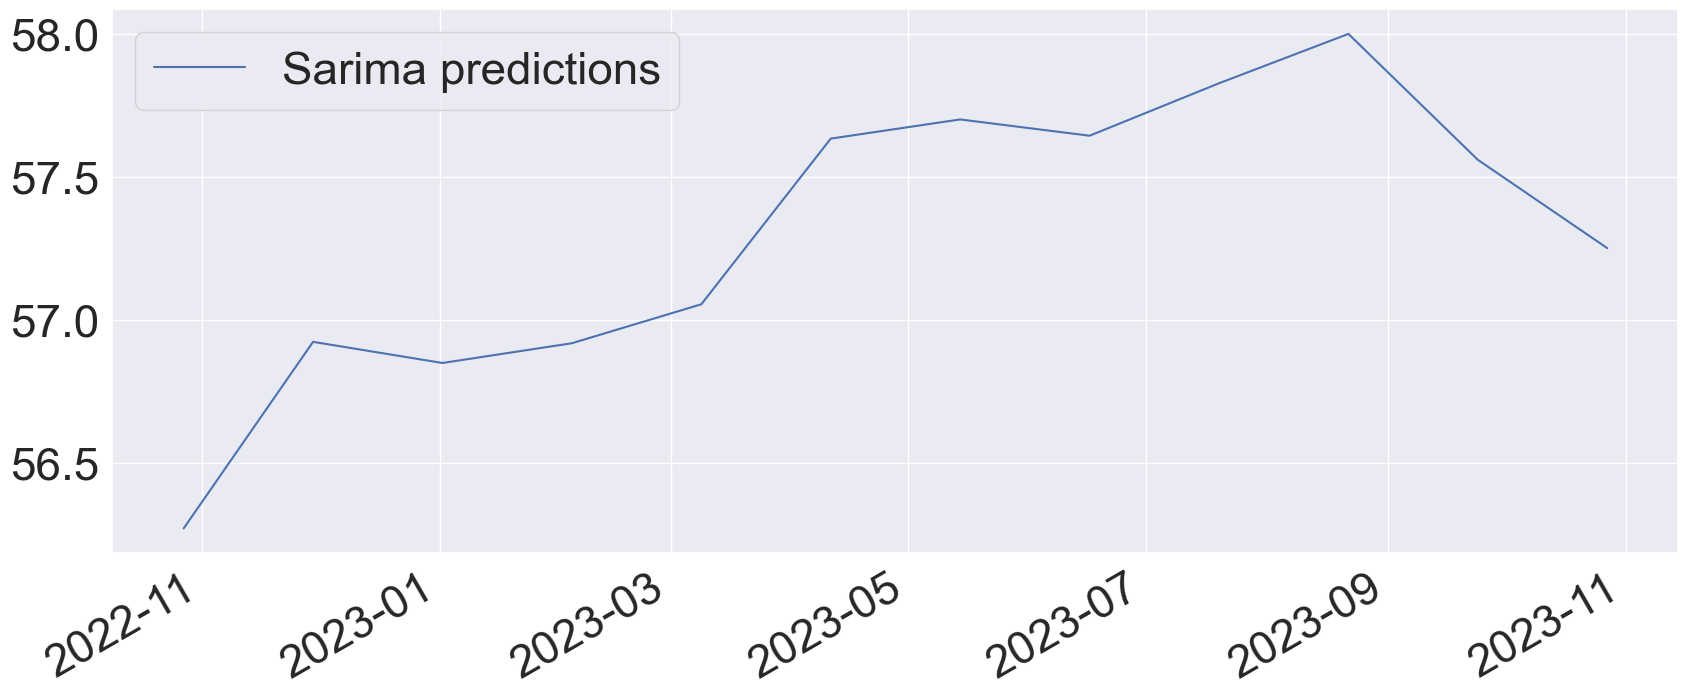

In [44]:
index_future_dates = pd.date_range(start='2022-10-27 04:00:00+00:00',end='2023-10-27 04:00:00+00:00',periods=12)
pred2 = model2.predict(start = len(modelling_series),end=len(modelling_series)+11,typ='levels').rename('Sarima predictions')
pred2.index=index_future_dates
print(pred2)
pred2.plot(legend=True)

In [45]:

Xtrain = modelling_series.iloc[:-12]
Xtest = modelling_series.iloc[-12:]

pred3 = model2.get_prediction(start = -12)
mean_pred = pred3.predicted_mean
confidence = pred3.conf_int()
#print(confidence)
lower = confidence.loc[:,'lower Close']
upper = confidence.loc[:,'upper Close']
#print(pred3)

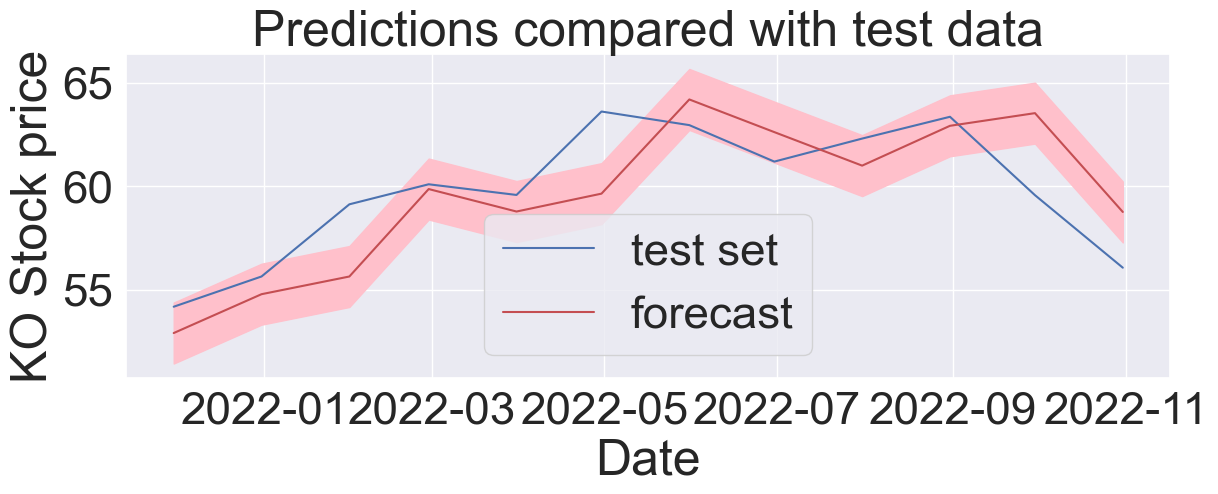

In [46]:
#print(Xtest)
#print(mean_pred)
plt.figure(figsize=(12,4))
plt.plot(Xtest.index, Xtest,label='test set')

plt.plot(mean_pred.index, mean_pred,color='r',label='forecast')

plt.fill_between(lower.index,lower,upper,color='pink')


plt.title('Predictions compared with test data')
plt.xlabel('Date')
plt.ylabel('KO Stock price')
plt.legend()
plt.show()

In [47]:
forecast = model2.get_forecast(steps=12)
meanforecast = forecast.predicted_mean
meanforecast.index=index_future_dates
confidence = forecast.conf_int()
confidence.index=index_future_dates
lower = confidence.loc[:,'lower Close']
upper = confidence.loc[:,'upper Close']
#print(confidence)

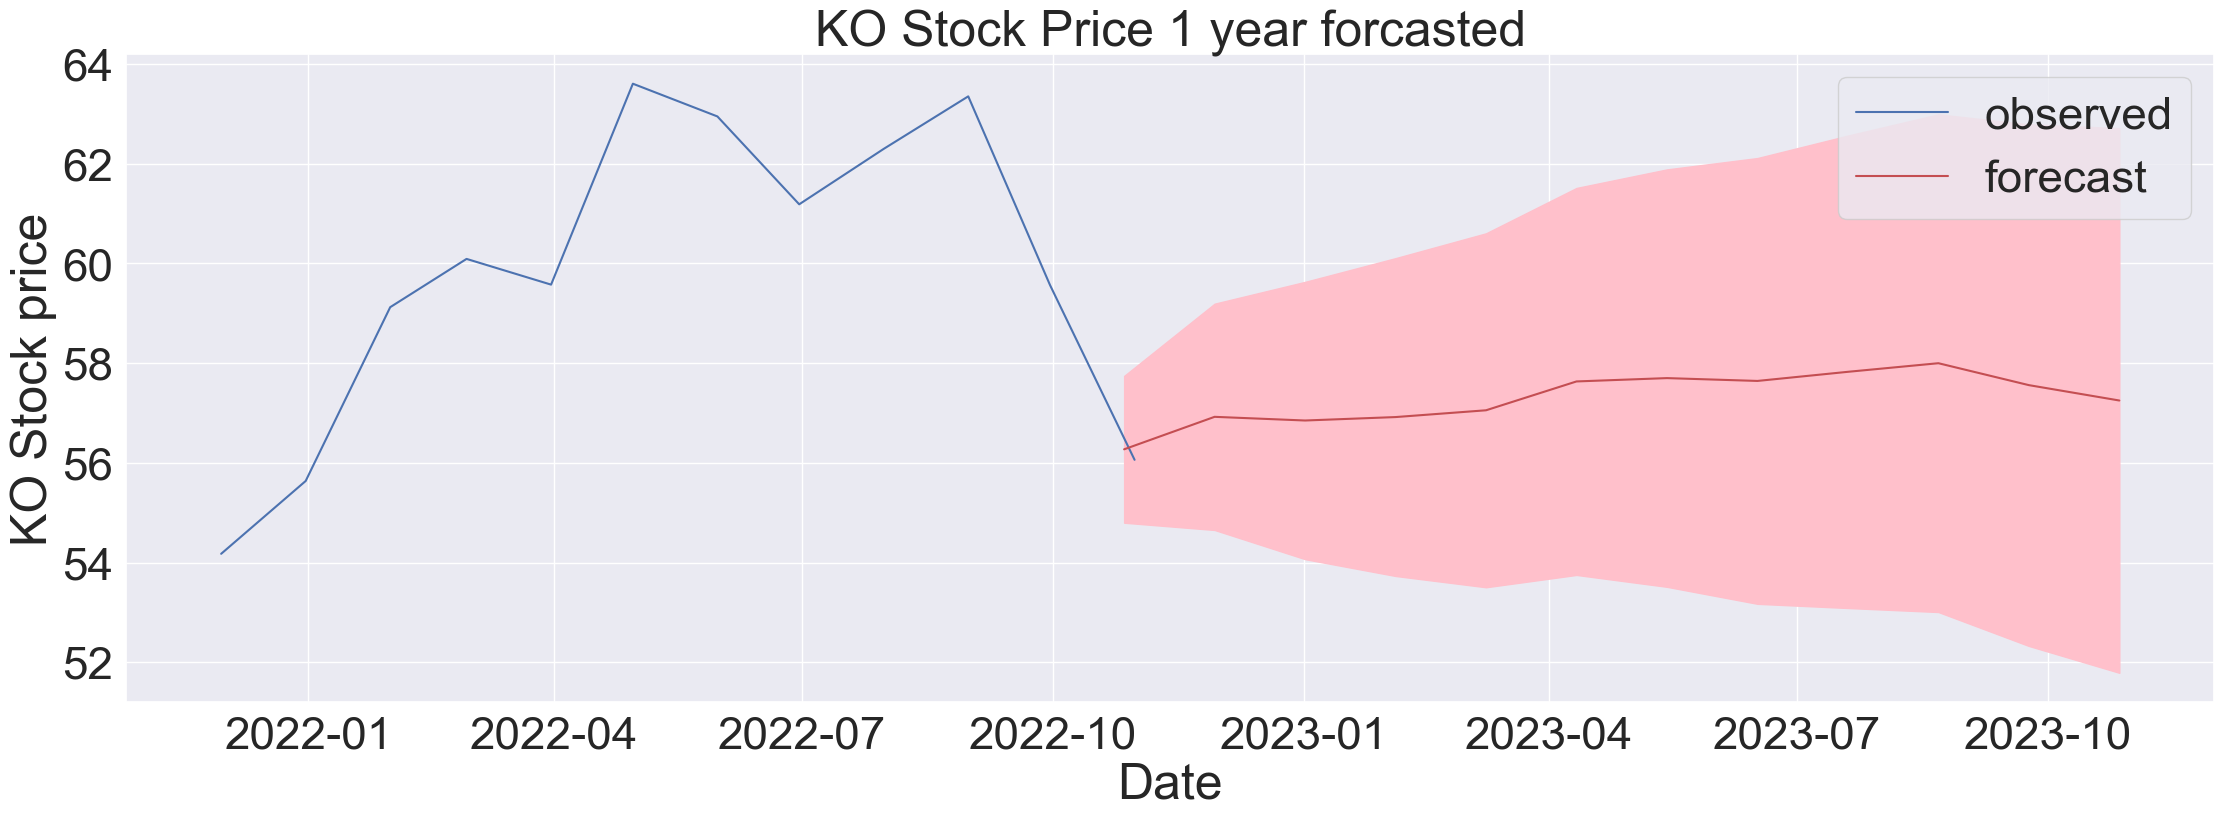

In [48]:
plt.figure(figsize=(24,8))
plt.plot(Xtest.index, Xtest,label='observed')

plt.plot(meanforecast.index, meanforecast,color='r',label='forecast')

plt.fill_between(lower.index,lower,upper,color='pink')


plt.title('KO Stock Price 1 year forcasted')
plt.xlabel('Date')
plt.ylabel('KO Stock price')
plt.legend()
plt.show()

In [49]:
print(mean_pred)
Xtest

Date
2021-11-30 00:00:00+00:00    52.904221
2021-12-31 00:00:00+00:00    54.781360
2022-01-31 00:00:00+00:00    55.635592
2022-02-28 00:00:00+00:00    59.860628
2022-03-31 00:00:00+00:00    58.774725
2022-04-30 00:00:00+00:00    59.639108
2022-05-31 00:00:00+00:00    64.189134
2022-06-30 00:00:00+00:00    62.611171
2022-07-31 00:00:00+00:00    60.991902
2022-08-31 00:00:00+00:00    62.916242
2022-09-30 00:00:00+00:00    63.527822
2022-10-31 00:00:00+00:00    58.754307
Freq: M, Name: predicted_mean, dtype: float64


Date
2021-11-30 00:00:00+00:00    54.176042
2021-12-31 00:00:00+00:00    55.636908
2022-01-31 00:00:00+00:00    59.123002
2022-02-28 00:00:00+00:00    60.091553
2022-03-31 00:00:00+00:00    59.575465
2022-04-30 00:00:00+00:00    63.605863
2022-05-31 00:00:00+00:00    62.949121
2022-06-30 00:00:00+00:00    61.186717
2022-07-31 00:00:00+00:00    62.298791
2022-08-31 00:00:00+00:00    63.352026
2022-09-30 00:00:00+00:00    59.564955
2022-10-31 00:00:00+00:00    56.061666
Freq: M, Name: Close, dtype: float64

In [50]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(mean_pred.values, Xtest.values))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(mean_pred, Xtest))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(mean_pred, Xtest)))

Mean Absolute Error (MAE): 1.806320471041521
Mean Squared Error (MSE) : 4.94669743469157
Root Mean Squared Error (RMSE): 2.224117225932925


In [51]:
mean_pred.mean()

59.54885098911475

In [52]:
Xtest.mean()

59.80184249815071

In [53]:
x2 = mean_pred.mean()
y2 = Xtest.mean()
Accuracy1 = x2/y2 *100
print("The accuracy of the model is " , Accuracy1)

The accuracy of the model is  99.57695031044605
